In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

Extract tech data from Yahoo Finance

In [5]:
tickers = ["NFLX", "TSLA", "AMZN", "ZM"]

df = pd.DataFrame()

for t in tickers:
    df[t] = wb.DataReader(t, data_source = "yahoo", start = "2020-01-01")["Adj Close"]
    
df.head()

,NFLX,TSLA,AMZN,ZM
Date,,,,
2020-01-02,329.809998,86.052002,1898.010010,68.720001
2020-01-03,325.899994,88.601997,1874.969971,67.279999
2020-01-06,335.829987,90.307999,1902.880005,70.320000
2020-01-07,330.750000,93.811996,1906.859985,71.900002
2020-01-08,339.260010,98.428001,1891.969971,72.550003


Calculate the daily returns of these companies

In [6]:
df_returns = np.log(df / df.shift(1))

df_returns

,NFLX,TSLA,AMZN,ZM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.011926,0.029203,-0.012213,-0.021177
2020-01-06,0.030014,0.019072,0.014776,0.044193
2020-01-07,-0.015242,0.038067,0.002089,0.022220
2020-01-08,0.025404,0.048033,-0.007839,0.009000
...,...,...,...,...
2020-12-14,0.037444,0.047760,0.012928,-0.002573
2020-12-15,-0.005066,-0.010337,0.002578,0.008650
2020-12-16,0.009669,-0.016688,0.023679,0.011376


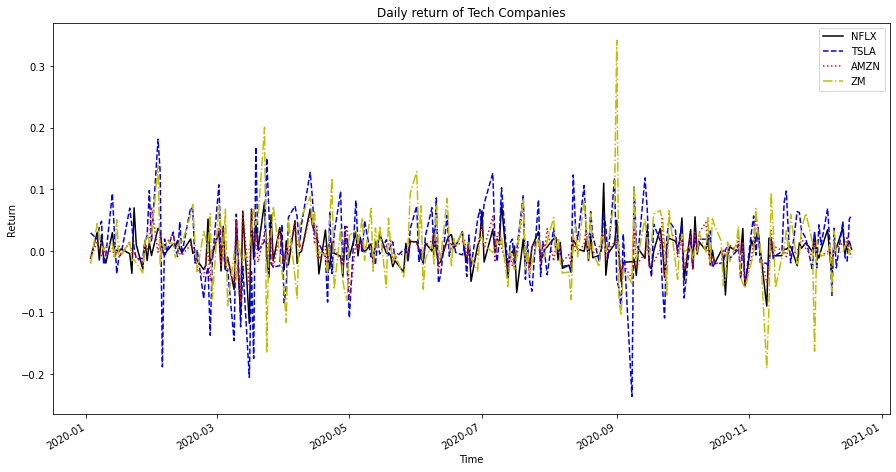

In [35]:
df_returns["NFLX"].plot(figsize = (15, 8), color = "black")
df_returns["TSLA"].plot(color = "blue", linestyle = "dashed")
df_returns["AMZN"].plot(color = "r", linestyle = "dotted")
df_returns["ZM"].plot(color = "y", linestyle = "dashdot")



plt.xlabel("Time")
plt.ylabel("Return")
plt.title("Daily return of Tech Companies")
plt.legend()

plt.savefig("F:/Data Science practice/Blog/Risks/Daily return of Tech Companies.png")
plt.show()

Risks of individual stocks

In [9]:
df_a_risks = df_returns[["NFLX", "TSLA", "AMZN", "ZM"]].std() * 250 ** 0.5

df_a_risks


NFLX    0.465631
TSLA    0.903348
AMZN    0.386797
ZM      0.829449
dtype: float64

Returns of individual stocks

In [10]:
df_a_returns = df_returns.mean() * 250

df_a_returns

NFLX    0.494592
TSLA    2.140328
AMZN    0.535718
ZM      1.820018
dtype: float64

Portfolio made of equal weights of these stocks

In [11]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [21]:
pfolio_a_return = np.dot(df_a_returns, weights)

print("Portfolip total return: ", str(round(pfolio_a_return, 3) * 100), "%")

Portfolip total return:  124.8 %


In [27]:
pfolio_var = np.dot(weights, np.dot(df_returns.cov() * 250, weights))
pfolio_vol = pfolio_var ** 0.5

print("Portfolio Variance: ", str(round(pfolio_var, 2) * 100), "%")
print("Portfolio Volatility: ", str(round(pfolio_vol, 2) * 100), "%")

Portfolio Variance:  22.0 %
Portfolio Volatility:  47.0 %


Diversifiable and non-Diversifiable Risks

In [48]:
NFLX_a_var = df_returns["NFLX"].var() * 250
TSLA_a_var = df_returns["TSLA"].var() * 250
AMZN_a_var = df_returns["AMZN"].var() * 250
ZM_a_var = df_returns["ZM"].var() * 250


In [38]:
div_risk = pfolio_var - (NFLX_a_var * weights[0] ** 2) - (TSLA_a_var * weights[0] ** 2) - (AMZN_a_var * weights[0] ** 2) - (ZM_a_var * weights[0] ** 2)

print("Diversifiable Risk of the Portfolio: ", str(round(div_risk, 3) * 100), "%")

Diversifiable Risk of the Portfolio:  10.2 %


In [42]:
undiv_risk = pfolio_var - div_risk

print("Non-Diversifiable Risk of the Portfolio: ", str(round(undiv_risk, 2) * 100), "%")

Non-Diversifiable Risk of the Portfolio:  12.0 %


How does it compare with NASDAQ indices?

In [43]:
tickers = tickers = ["NFLX", "TSLA", "AMZN", "ZM", "^IXIC"]

ind_df = pd.DataFrame()

for t in tickers:
    ind_df[t] = wb.DataReader(t, data_source = "yahoo", start = "2020-01-01")["Adj Close"]
    
ind_df.head()

,NFLX,TSLA,AMZN,ZM,^IXIC
Date,,,,,
2020-01-02,329.809998,86.052002,1898.010010,68.720001,9092.190430
2020-01-03,325.899994,88.601997,1874.969971,67.279999,9020.769531
2020-01-06,335.829987,90.307999,1902.880005,70.320000,9071.469727
2020-01-07,330.750000,93.811996,1906.859985,71.900002,9068.580078
2020-01-08,339.260010,98.428001,1891.969971,72.550003,9129.240234


Normalise graph axes

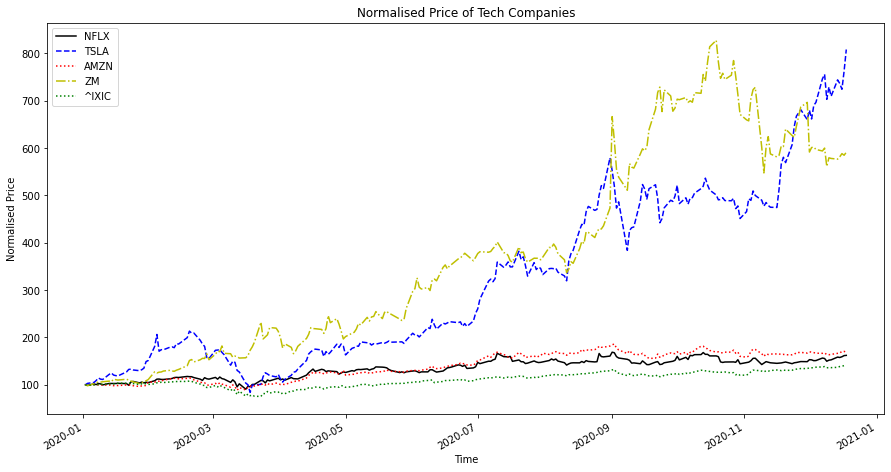

In [53]:
normalised_df = (ind_df / ind_df.iloc[0] * 100)

normalised_df["NFLX"].plot(figsize = (15, 8), color = "black")
normalised_df["TSLA"].plot(color = "blue", linestyle = "dashed")
normalised_df["AMZN"].plot(color = "r", linestyle = "dotted")
normalised_df["ZM"].plot(color = "y", linestyle = "dashdot")
normalised_df["^IXIC"].plot(color = "g", linestyle = "dotted")

plt.xlabel("Time")
plt.ylabel("Normalised Price")
plt.title("Normalised Price of Tech Companies")
plt.legend()

plt.savefig("F:/Data Science practice/Blog/Risks/Normalised Price of Tech Companies.png")
plt.show()

In [ ]:
ind_return / 